# EDA and Data Cleaning



* check for missing values
* check for duplicates
* relationship of ocean proximity and pricing (median house value)
* median income and pricing
* housing median age and pricing
* median income by area (long and latitude)
* correlation of each variable



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/housing.csv")

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [ ]:
df = df.dropna(subset = ['total_bedrooms'])

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


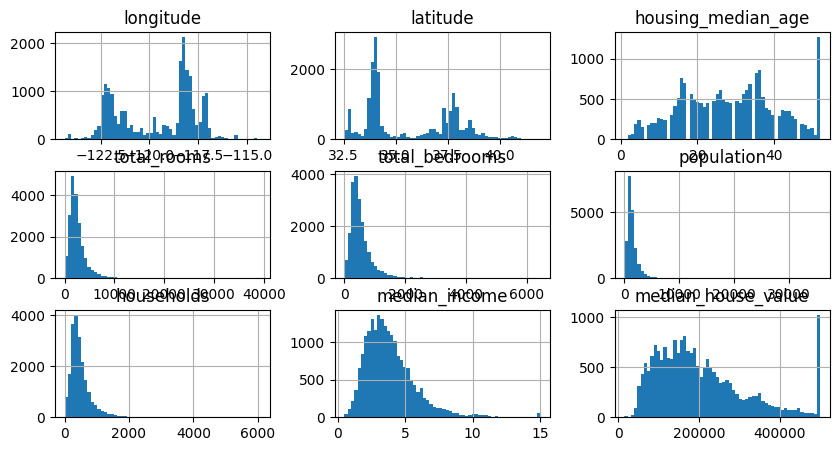

In [ ]:
df.hist(bins=60, figsize=(10,5));
plt.show()

<ipython-input-11-94d701a49336>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ocean_proximity', y='median_house_value', data=df, estimator='mean', ci=None)


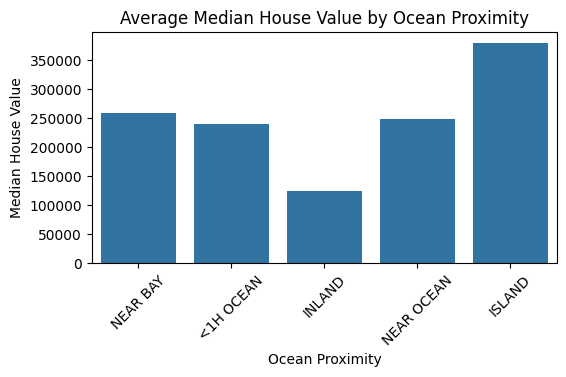

In [ ]:
# Create the bar plot
plt.figure(figsize=(6, 3))
sns.barplot(x='ocean_proximity', y='median_house_value', data=df, estimator='mean', ci=None)

# Add labels and title
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.title('Average Median House Value by Ocean Proximity')
plt.xticks(rotation=45)  # Rotate category labels if needed for readability

# Show plot
plt.show()

prices goes up when it is close to a body of water, it doesnt have to be the ocean. In the graph where the housings that are near bay where it is close to a body of water that is not directly connected to the ocean is priced mostly equal to that of the prices on the housings that are close to the ocean however as suspected the pricing of the house skyrocketed when it is in a literal island where it is surrounded by the ocean

In [ ]:
df['housing_median_age'].unique()

array([41., 21., 52., 42., 50., 40., 49., 48., 51., 43.,  2., 46., 26.,
       20., 17., 36., 19., 23., 38., 35., 10., 16., 27., 39., 31., 29.,
       22., 37., 28., 34., 32., 47., 44., 30., 18., 45., 33., 24., 15.,
       14., 13., 25.,  5., 12.,  6.,  8.,  9.,  7.,  3.,  4., 11.,  1.])

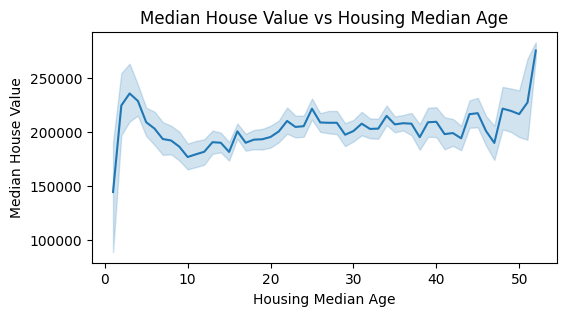

In [ ]:
df_sorted = df.sort_values(by='housing_median_age')

# Create the line plot
plt.figure(figsize=(6, 3))
sns.lineplot(x='housing_median_age', y='median_house_value', data=df_sorted)

# Add labels and title
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.title('Median House Value vs Housing Median Age')

# Show the plot
plt.show()

# Model training


In [ ]:
ocean_proximity_mapping = {
    'NEAR BAY': 1,
    '<1H OCEAN': 2,
    'INLAND': 3,
    'NEAR OCEAN': 4,
    'ISLAND': 5
}

df['ocean_proximity'] = df['ocean_proximity'].map(ocean_proximity_mapping)

<ipython-input-14-97de660a640a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ocean_proximity'] = df['ocean_proximity'].map(ocean_proximity_mapping)


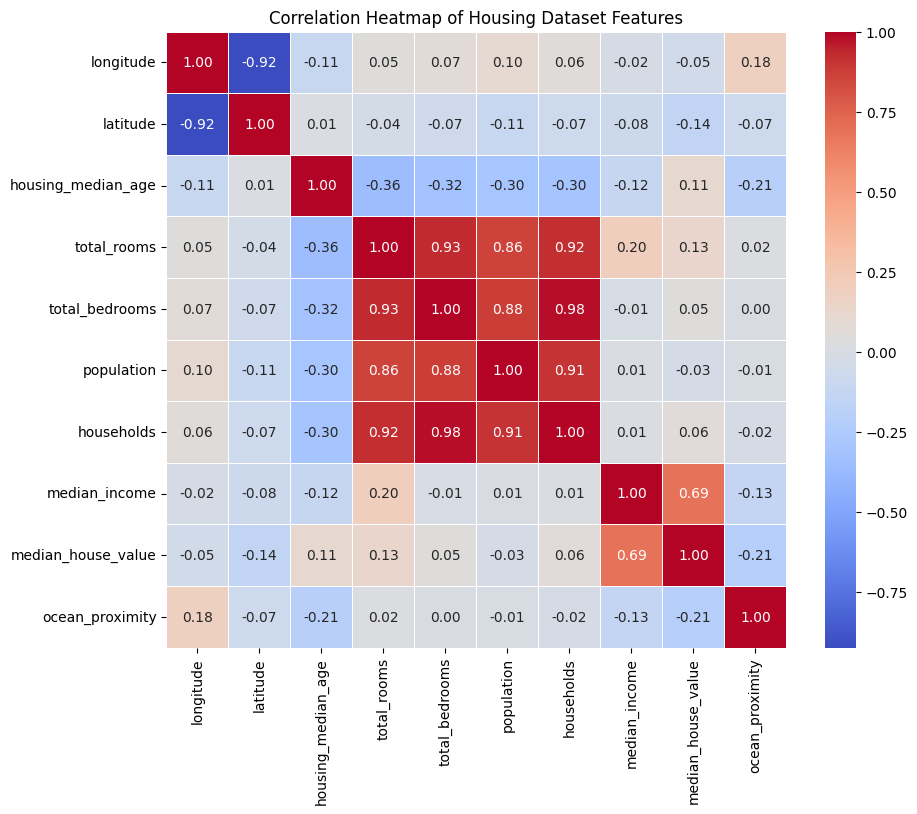

In [ ]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Housing Dataset Features")

# Show plot
plt.show()

Ive decided to drop all features that might not contribute to the predictive power of the model. In the case of total rooms and bedrooms I will only use the number of total rooms as this also includes the bedroom and by doing so can reduce the redunduncy of the data making the dataset less complex

In [ ]:
'''
  #Draw a Bivariate Seaborn Pairgrid /w KDE density w/
def snsPairGrid(df):

    # Plots a Seaborn Pairgrid w/ KDE & scatter plot of df features
    g = sns.PairGrid(df,diag_sharey=False)
    g.fig.set_size_inches(14,13)
    g.map_diag(sns.kdeplot, lw=2) # draw kde approximation on the diagonal
    g.map_lower(sns.scatterplot,s=15,edgecolor="k",linewidth=1,alpha=0.4) # scattered plot on lower half
    g.map_lower(sns.kdeplot,cmap='plasma',n_levels=10) # kde approximation on lower half
    plt.tight_layout()

# Seaborn get a little slow, let's plot some interesting features
tlist = ['median_income','total_rooms','housing_median_age','latitude','median_house_value','population']
snsPairGrid(df[tlist]) '''

'\n  #Draw a Bivariate Seaborn Pairgrid /w KDE density w/\ndef snsPairGrid(df):\n\n    # Plots a Seaborn Pairgrid w/ KDE & scatter plot of df features\n    g = sns.PairGrid(df,diag_sharey=False)\n    g.fig.set_size_inches(14,13)\n    g.map_diag(sns.kdeplot, lw=2) # draw kde approximation on the diagonal\n    g.map_lower(sns.scatterplot,s=15,edgecolor="k",linewidth=1,alpha=0.4) # scattered plot on lower half\n    g.map_lower(sns.kdeplot,cmap=\'plasma\',n_levels=10) # kde approximation on lower half\n    plt.tight_layout()\n\n# Seaborn get a little slow, let\'s plot some interesting features\ntlist = [\'median_income\',\'total_rooms\',\'housing_median_age\',\'latitude\',\'median_house_value\',\'population\']\nsnsPairGrid(df[tlist]) '

In [ ]:
# trdata_upd : training data w/ removed outliers
maxval2 = df['median_house_value'].max() # get the maximum value
df = df[df['median_house_value'] != maxval2]
df = df[df['median_house_value'] != maxval2]

# df.hist(bins=60, figsize=(15,9));plt.show() # looks like its completely removed.

In [ ]:
# Make a feature that contains both longtitude & latitude
df['diag_coord'] = (df['longitude'] + df['latitude'])         # 'diagonal coordinate', works for this coord
df['bedperroom'] = df['total_bedrooms']/df['total_rooms']     # feature w/ bedrooms/room ratio

# df = df.drop(['longitude', 'latitude', 'total_bedrooms', 'households'], axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,diag_coord,bedperroom
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1,-84.35,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1,-84.36,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1,-84.39,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1,-84.40,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1,-84.40,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,3,-81.61,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,3,-81.72,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,3,-81.79,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,3,-81.89,0.219892


In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import cross_val_score

Model Performance with default hyperparameters:
* Linear Regression: RMSE = 74220.72224571893
* Decision Tree: RMSE = 93332.91963203551
* Random Forest: RMSE = 70514.74372613651
* Support Vector Regressor: RMSE = 131023.3086023416
* XGBoost: RMSE = 67692.93171171942
* RNN: RMSE = 235869.65426790732

these are the previous results before removing other algorithms that are not fit for this problem (those that have higher RMSE). I have decided to use RF and XGB and fine tune it for better performance

# Tuning hyperparameters using GridseachCV

# GridSearchCV results

* Best Random Forest Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Random Forest RMSE: 49928.03787013967

* Best XGBoost Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best XGBoost RMSE: 46350.795756630985

In [ ]:
# Calculate the median house value from your dataset
median_house_value = df['median_house_value'].median()
print(f"Median House Value: ${median_house_value:,.2f}")


Median House Value: $173,800.00


In [ ]:
'''from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest with a focus on avoiding overfitting
param_grid_rf = {
    'max_depth': [10, 20, 30],                # Limited depths to reduce overfitting
    'min_samples_split': [5, 10, 15],         # Requires more samples to split a node
    'min_samples_leaf': [2, 5, 10],           # Requires more samples at leaf nodes
    'max_features': ['sqrt', 'log2'],         # Limit features to increase randomness
    'n_estimators': [100, 200, 300]           # Number of trees
}

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV for Random Forest with RMSE scoring
grid_search_rf = GridSearchCV(
    rf_model,
    param_grid_rf,
    scoring='neg_root_mean_squared_error',  # Using RMSE as the scoring metric
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV for Random Forest
grid_search_rf.fit(X_train, y_train)
best_rf_params = grid_search_rf.best_params_
best_rf_rmse = -grid_search_rf.best_score_
print("Best Random Forest Parameters to Avoid Overfitting:", best_rf_params)
print("Best Random Forest RMSE with Reduced Overfitting:", best_rf_rmse)

# Define parameter grid for XGBoost with regularization and complexity controls
param_grid_xgb = {
    'max_depth': [3, 5, 7],                    # Limit depth to avoid overfitting
    'learning_rate': [0.01, 0.05, 0.1],        # Smaller learning rates for smoother learning
    'n_estimators': [100, 200, 300],           # Control the number of boosting rounds
    'subsample': [0.6, 0.8, 1.0],              # Subsampling to prevent overfitting
    'colsample_bytree': [0.6, 0.8, 1.0],       # Feature subsampling
    'min_child_weight': [1, 5, 10],            # Minimum child weight to control complexity
    'reg_alpha': [0, 0.1, 0.5],                # L1 regularization (alpha)
    'reg_lambda': [1, 1.5, 2]                  # L2 regularization (lambda)
}

# Initialize XGBRegressor
xgb_model = XGBRegressor(random_state=42, objective='reg:squarederror')

# Set up GridSearchCV for XGBoost with RMSE scoring
grid_search_xgb = GridSearchCV(
    xgb_model,
    param_grid_xgb,
    scoring='neg_root_mean_squared_error',  # Using RMSE as the scoring metric
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV for XGBoost
grid_search_xgb.fit(X_train, y_train)
best_xgb_params = grid_search_xgb.best_params_
best_xgb_rmse = -grid_search_xgb.best_score_
print("Best XGBoost Parameters to Avoid Overfitting:", best_xgb_params)
print("Best XGBoost RMSE with Reduced Overfitting:", best_xgb_rmse)
'''

'from sklearn.model_selection import GridSearchCV\n\n# Define parameter grid for Random Forest with a focus on avoiding overfitting\nparam_grid_rf = {\n    \'max_depth\': [10, 20, 30],                # Limited depths to reduce overfitting\n    \'min_samples_split\': [5, 10, 15],         # Requires more samples to split a node\n    \'min_samples_leaf\': [2, 5, 10],           # Requires more samples at leaf nodes\n    \'max_features\': [\'sqrt\', \'log2\'],         # Limit features to increase randomness\n    \'n_estimators\': [100, 200, 300]           # Number of trees\n}\n\n# Initialize RandomForestRegressor\nrf_model = RandomForestRegressor(random_state=42)\n\n# Set up GridSearchCV for Random Forest with RMSE scoring\ngrid_search_rf = GridSearchCV(\n    rf_model,\n    param_grid_rf,\n    scoring=\'neg_root_mean_squared_error\',  # Using RMSE as the scoring metric\n    cv=5,\n    n_jobs=-1,\n    verbose=1\n)\n\n# Fit GridSearchCV for Random Forest\ngrid_search_rf.fit(X_train, y_train)\

## result of gridsearch above before removing features



* Best Random Forest Parameters to Avoid Overfitting: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Random Forest RMSE with Reduced Overfitting: 49420.03121746068

* Best XGBoost Parameters to Avoid Overfitting: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 1.0}
Best XGBoost RMSE with Reduced Overfitting: 45682.4135376938



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# Split data
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize results dictionary to store cross-validated RMSEs
cv_results = {'Random Forest': {}, 'XGBoost': {}, 'Ensemble': {}}

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define individual models
rf_model = RandomForestRegressor(
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=300,
    random_state=42
)

xgb_model = XGBRegressor(
    colsample_bytree=0.6,
    learning_rate=0.1,
    max_depth=7,
    min_child_weight=1,
    n_estimators=300,
    reg_alpha=0.1,
    reg_lambda=1,
    subsample=1.0,
    random_state=42
)

# Combine models in VotingRegressor
ensemble_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ensemble', VotingRegressor([('rf', rf_model), ('xgb', xgb_model)]))
])

# Lists to store RMSEs for each model
rf_train_rmse, rf_val_rmse = [], []
xgb_train_rmse, xgb_val_rmse = [], []
ensemble_train_rmse, ensemble_val_rmse = [], []

# Cross-validation loop for each model including the ensemble
for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Random Forest
    rf_model.fit(X_train_fold, y_train_fold)
    rf_train_rmse.append(np.sqrt(mean_squared_error(y_train_fold, rf_model.predict(X_train_fold))))
    rf_val_rmse.append(np.sqrt(mean_squared_error(y_val_fold, rf_model.predict(X_val_fold))))

    # XGBoost
    xgb_model.fit(X_train_fold, y_train_fold)
    xgb_train_rmse.append(np.sqrt(mean_squared_error(y_train_fold, xgb_model.predict(X_train_fold))))
    xgb_val_rmse.append(np.sqrt(mean_squared_error(y_val_fold, xgb_model.predict(X_val_fold))))

    # Ensemble (VotingRegressor)
    ensemble_pipeline.fit(X_train_fold, y_train_fold)
    ensemble_train_rmse.append(np.sqrt(mean_squared_error(y_train_fold, ensemble_pipeline.predict(X_train_fold))))
    ensemble_val_rmse.append(np.sqrt(mean_squared_error(y_val_fold, ensemble_pipeline.predict(X_val_fold))))

# Store mean RMSEs across folds for each model
cv_results['Random Forest']['Train RMSE'] = np.mean(rf_train_rmse)
cv_results['Random Forest']['Validation RMSE'] = np.mean(rf_val_rmse)

cv_results['XGBoost']['Train RMSE'] = np.mean(xgb_train_rmse)
cv_results['XGBoost']['Validation RMSE'] = np.mean(xgb_val_rmse)

cv_results['Ensemble']['Train RMSE'] = np.mean(ensemble_train_rmse)
cv_results['Ensemble']['Validation RMSE'] = np.mean(ensemble_val_rmse)

# Print out the results
print("Random Forest:")
print(f"  Train RMSE: {cv_results['Random Forest']['Train RMSE']}")
print(f"  Validation RMSE: {cv_results['Random Forest']['Validation RMSE']}\n")

print("XGBoost:")
print(f"  Train RMSE: {cv_results['XGBoost']['Train RMSE']}")
print(f"  Validation RMSE: {cv_results['XGBoost']['Validation RMSE']}\n")

print("Ensemble (Voting Regressor):")
print(f"  Train RMSE: {cv_results['Ensemble']['Train RMSE']}")
print(f"  Validation RMSE: {cv_results['Ensemble']['Validation RMSE']}")


Random Forest:
  Train RMSE: 23867.427364817406
  Validation RMSE: 43952.760213825284

XGBoost:
  Train RMSE: 16341.069081150368
  Validation RMSE: 41046.12047459241

Ensemble (Voting Regressor):
  Train RMSE: 18961.14790686874
  Validation RMSE: 41497.34790922895


In [ ]:
import optuna

# Set up cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define objective function for Optuna to minimize RMSE
def objective(trial):
    # Hyperparameters for RandomForestRegressor
    rf_params = {
        'n_estimators': trial.suggest_int('rf_n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('rf_max_depth', 10, 100, step=10),
        'min_samples_split': trial.suggest_int('rf_min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('rf_min_samples_leaf', 1, 4),
        'max_features': trial.suggest_categorical('rf_max_features', ['sqrt', 'log2', None])
    }

    # Hyperparameters for XGBRegressor with regularization terms
    xgb_params = {
        'learning_rate': trial.suggest_float('xgb_learning_rate', 0.01, 0.2, step=0.01),
        'n_estimators': trial.suggest_int('xgb_n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('xgb_max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('xgb_min_child_weight', 1, 6),
        'subsample': trial.suggest_float('xgb_subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('xgb_colsample_bytree', 0.5, 1.0),

        # Regularization parameters
        'reg_alpha': trial.suggest_float('xgb_reg_alpha', 0.0, 1.0),  # L1 regularization
        'reg_lambda': trial.suggest_float('xgb_reg_lambda', 0.0, 1.0)  # L2 regularization
    }

    # Define individual models
    rf_model = RandomForestRegressor(random_state=42, **rf_params)
    xgb_model = XGBRegressor(random_state=42, **xgb_params)

    # Create the ensemble (VotingRegressor) with tuned models
    ensemble_model = VotingRegressor([('rf', rf_model), ('xgb', xgb_model)])

    # Create a pipeline with scaling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ensemble', ensemble_model)
    ])

    # Cross-validation to evaluate the performance
    rmse_scores = []
    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        pipeline.fit(X_train_fold, y_train_fold)
        y_val_pred = pipeline.predict(X_val_fold)
        rmse = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
        rmse_scores.append(rmse)

    # Return the mean RMSE across folds
    return np.mean(rmse_scores)

# Create an Optuna study to minimize the objective (RMSE)
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)  # Perform 50 trials for optimization

# Print the best hyperparameters found
print("Best hyperparameters found: ", study.best_params)

# Use the best hyperparameters to train the final model
best_rf_params = {
    'n_estimators': study.best_params['rf_n_estimators'],
    'max_depth': study.best_params['rf_max_depth'],
    'min_samples_split': study.best_params['rf_min_samples_split'],
    'min_samples_leaf': study.best_params['rf_min_samples_leaf'],
    'max_features': study.best_params['rf_max_features']
}

best_xgb_params = {
    'learning_rate': study.best_params['xgb_learning_rate'],
    'n_estimators': study.best_params['xgb_n_estimators'],
    'max_depth': study.best_params['xgb_max_depth'],
    'min_child_weight': study.best_params['xgb_min_child_weight'],
    'subsample': study.best_params['xgb_subsample'],
    'colsample_bytree': study.best_params['xgb_colsample_bytree'],
    'reg_alpha': study.best_params['xgb_reg_alpha'],  # L1 regularization
    'reg_lambda': study.best_params['xgb_reg_lambda']  # L2 regularization
}

# Train the final model with the best parameters
rf_model = RandomForestRegressor(random_state=42, **best_rf_params)
xgb_model = XGBRegressor(random_state=42, **best_xgb_params)

ensemble_model = VotingRegressor([('rf', rf_model), ('xgb', xgb_model)])

final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ensemble', ensemble_model)
])

final_pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = final_pipeline.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE with optimized ensemble model: {test_rmse}")

[I 2024-11-12 09:17:33,887] A new study created in memory with name: no-name-3ce166e6-630d-45b7-8e72-fd0ff60d7a80
[I 2024-11-12 09:19:11,099] Trial 0 finished with value: 42831.27336819338 and parameters: {'rf_n_estimators': 200, 'rf_max_depth': 10, 'rf_min_samples_split': 7, 'rf_min_samples_leaf': 3, 'rf_max_features': 'sqrt', 'xgb_learning_rate': 0.02, 'xgb_n_estimators': 900, 'xgb_max_depth': 8, 'xgb_min_child_weight': 4, 'xgb_subsample': 0.7177890748023551, 'xgb_colsample_bytree': 0.9787969221789752, 'xgb_reg_alpha': 0.35675618681098253, 'xgb_reg_lambda': 0.17128784483090165}. Best is trial 0 with value: 42831.27336819338.
[I 2024-11-12 09:20:07,456] Trial 1 finished with value: 41926.70186828847 and parameters: {'rf_n_estimators': 200, 'rf_max_depth': 70, 'rf_min_samples_split': 9, 'rf_min_samples_leaf': 4, 'rf_max_features': 'sqrt', 'xgb_learning_rate': 0.04, 'xgb_n_estimators': 700, 'xgb_max_depth': 6, 'xgb_min_child_weight': 2, 'xgb_subsample': 0.8314637691695955, 'xgb_colsampl

Best hyperparameters found:  {'rf_n_estimators': 900, 'rf_max_depth': 90, 'rf_min_samples_split': 5, 'rf_min_samples_leaf': 1, 'rf_max_features': 'sqrt', 'xgb_learning_rate': 0.09, 'xgb_n_estimators': 900, 'xgb_max_depth': 6, 'xgb_min_child_weight': 2, 'xgb_subsample': 0.847529921218237, 'xgb_colsample_bytree': 0.8222492907741125, 'xgb_reg_alpha': 0.41255343211470213, 'xgb_reg_lambda': 0.8039471495897542}
Test RMSE with optimized ensemble model: 40030.766308424536


# Results = Ensemble model performing the best with RMSE of 40030.76 compared to the previous models and other models that are in the kaggle using bayesian model